In [1]:
%reload_ext autoreload
%autoreload 2
import copy

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pygmo

import logging
logging.basicConfig(level=logging.DEBUG)

In [2]:
# Local
import robustranking as rr
# from robustranking.benchmark import Benchmark
# from robustranking.comparison import BootstrapComparison, AggregatedComparison, MOBootstrapComparison
# from robustranking.utils.plots import *
# from robustranking.utils.multiobjective import fast_non_dominated_sorting, dominates
from robustranking.comparison.ranked_comparison import RankedComparison

import matplotlib
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

## Read and process data
SAT competition 2016 - Main track

In [3]:
df = pd.read_csv("./Rundata/sc2016-detailed-results/main.csv")

df["solver"] = df["solver"] + df["configuration"]
df["solved"] = df["status"] == "complete"
df = df[["solver","benchmark", "cpu time", "solved"]]
df = df.rename(columns={"cpu time": "PAR2"})
df
#df[df["objective"] == "solved"].groupby("solver").sum()[0].reset_index().sort_values(0, ascending=False)

solver  \
0              GHackCOMSPS_DRUPghack_drup   
1                       Scavel_SATdefault   
2                   Beans And Eggsdefault   
3                     cmsat5_main2default   
4                 cmsat5_autotune2default   
...                                   ...   
14495  MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup   
14496  MapleCOMSPS_DRUPseq_LRB_VSIDS_drup   
14497                   Riss6default_DRAT   
14498                  Riss6blackbox_DRAT   
14499                Glucose_nbSatdefault   

                                         benchmark      PAR2  solved  
0                                 sat/10pipe_k.cnf   543.341    True  
1                                 sat/10pipe_k.cnf  5000.020   False  
2                                 sat/10pipe_k.cnf  1356.550    True  
3                                 sat/10pipe_k.cnf  5000.020   False  
4                                 sat/10pipe_k.cnf  1295.360    True  
...                                            ...       ...     ...  
14495  sat/sc16craft_tseitingrid7x200_shuffled.cnf  5000.020   False  
14496  sat/sc16craft_tseitingrid7x200_shuffled.cnf  5000.020   False  
14497  sat/sc16craft_tseitingrid7x200_shuffled.cnf  5000.010   False  
14498  sat/sc16craft_tseitingrid7x200_shuffled.cnf  5000.030   False  
14499  sat/sc16craft_tseitingrid7x200_shuffled.cnf  5000.020   False  

[14500 rows x 4 columns]

## Convert dataframe to Benchmark object
This object can transform to different data structures and perform checks on the benchmark

In [4]:
competition = rr.Benchmark()

competition.from_pandas(df, "solver", "benchmark", ["PAR2", "solved"])
competition.show_stats()

algorithms       29
instances       500
objectives        2
values        29000
complete       True
dtype: object

## Rank-based comparison

In [5]:
rcomparison = RankedComparison(competition, minimise={"solved": False, "PAR2": True})

In [6]:
rcomparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")


objective                           PAR2         solved        
                                    rank   score   rank   score
algorithm                                                      
MapleCOMSPS_CHB_DRUPCHB_VSIDS_drup     1   9.512     19  14.764
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup     2   9.644      8  14.394
GHackCOMSPS_DRUPghack_drup             3  10.248     13  14.532
COMiniSatPS Chandrasekhar DRUPdrup     4  10.256     12  14.480
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup     5  10.362      1  14.154
YalSAT 03rdefault                      6  13.024     29  19.094
glucosedefault                         7  13.074     11  14.452
tb_glucosedefault                      8  13.264     10  14.426
MapleGlucosedefault                    9  14.604     14  14.652
CHBR_glucose_tuneddefault             10  14.620     26  15.000
CHBR_glucosedefault                   11  14.784     24  14.974
glucose_hack_kiel_newScriptmain_new   12  15.482      4  14.302
Riss6noPP_DRAT                        13  15.612      2  14.192
glue_altdefault                       14  15.828     17  14.688
cmsat5_main2default                   15  15.932     22  14.944
cmsat5_autotune2default               16  16.040     23  14.948
glueminisat-2.2.10-81-mainmaintrack   17  16.152     20  14.804
Splatz 06v maindefault                18  16.308     16  14.682
Scavel_SATdefault                     19  16.528     28  15.860
Beans And Eggsdefault                 20  16.552      9  14.422
tc_glucosedefault                     21  16.638      6  14.336
Riss6default_DRAT                     22  16.710      7  14.394
Riss6blackbox_DRAT                    23  16.786     25  14.986
gulchdefault                          24  16.898     27  15.094
glucosePLEdefault                     25  16.922     18  14.716
Lingeling bbc maindefault             26  16.936      3  14.216
MapleCMSdefault                       27  17.332     21  14.862
abcdSAT_drupdefault                   28  17.352      5  14.334
Glucose_nbSatdefault                  29  17.770     15  14.680

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/utils/plots.py:675: UserWarning: More than one objectives detected! Only using the first one; 'PAR2'
  if filename:
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-da

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', name='cmb10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/min

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf', name='Plantagenet Cherokee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tahoma.ttf', name='Tahoma', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='scalable')) = 10.42525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Suppl

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', name='Georgia', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPahawhHmong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(Fon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniBol.otf', name='STIXNonUnicode', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72.ttc', name='Bodoni 72', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Libr

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf', name='Noto Sans Tai Viet', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman.ttf', name='Times New Roman', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMro-Regular.ttf', name='Noto Sans Mro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fna

[10.248, 16.528, 16.552, 15.932, 16.04, 13.024, 16.936, 13.074, 14.784, 14.62, 13.264, 10.256, 9.512, 9.644, 10.362, 16.308, 17.77, 17.332, 14.604, 15.828, 16.922, 17.352, 15.482, 16.152, 16.898, 16.638, 15.612, 16.71, 16.786]


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Black.ttf', name='Arial Black', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneral.otf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Diwan Thuluth.ttf', name='Diwan Thuluth', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf', name='Noto Sans Tagalog', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Li

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizOneSymReg.otf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Sathu.ttf', name='Sathu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', name='Hiragino Maru Gothic Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMiao-Regular.ttf', name='Noto Sans Miao', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansNewa-Regular.ttf', name='Noto Sans Newa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Sys

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf', name='Noto Sans Tai Tham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Athelas.ttc', name='Athelas', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Al Tarikh.ttc', name='Al Tarikh', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Symbol.ttf', name='Symbol', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Tamil Sangam M

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W6.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gujarati Sangam MN.ttc', name='Gujarati Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Andale Mono.ttf', name='Andale Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntUpReg.otf', name='STIXIntegralsUp', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldSouthArabian-Regular.ttf', name='Noto Sans Old South Arabian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSaurashtra-Regular.ttf', name='Noto Sans Saurashtra', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/NewYork.ttf', name='.New York', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(Font

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fnam

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname=

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPsalterPahlavi-Regular.ttf', name='Noto Sans Psalter Pahlavi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc', name='Hiragino Sans', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizFourSymReg.otf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansAvestan-Regular.ttf', name='Noto Sans Avestan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: sc

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/DIN Condensed Bold.ttf', name='DIN Condensed', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/PTSerifCaption.ttc', name='PT Serif Caption', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', name='Noto Sans Glagolitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Bold Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 7.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Chalkboard.ttc', name='Chalkboard', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Charter.ttc', name='Charter', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supple

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/GillSans.ttc', name='Gill Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille.ttf', name='Apple Braille', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/AppleSDGothicNeo.ttc', 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSRounded.ttf', name='.SF NS Rounded', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow.ttf', name='Arial Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSylotiNagri-Regular.ttf', name='Noto Sans Syloti Nagri', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf', name='Noto Sans Marchen', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', name='InaiMathi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/GeezaPro.ttc', name='Geeza Pro', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLinearA-Regular.ttf', name='Noto Sans Linear A', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf', name='Noto Sans Old Turkic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Li

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf', name='Arial Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Muna.ttc', name='Muna', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf', 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMahajani-Regular.ttf', name='Noto Sans Mahajani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Herculanum.ttf', name='Herculanum', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLydian-Regular.ttf', name='Noto Sans Lydian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana Bold.ttf', name='Verdana', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 3.9713636363636367
DEBUG:matplotlib.font_manager:findfont: score(FontEn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bodoni 72 Smallcaps Book.ttf', name='Bodoni 72 Smallcaps', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Zapfino.ttf', name='Zapfino', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXVar.otf', name='STIXVariants', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Georgia Italic.ttf', name='Georgia', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Ko

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Narrow Italic.ttf', name='Arial Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Shree714.ttc', name='Shree Devanagari 714', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


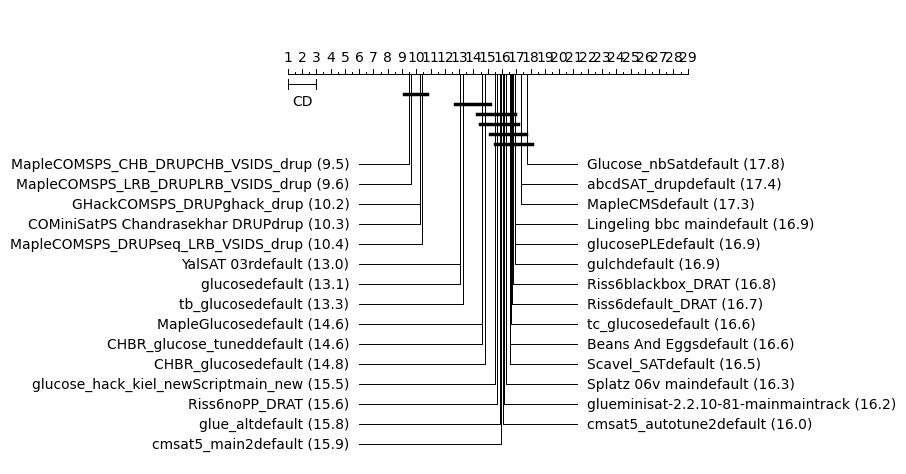

In [8]:
rr.utils.plots.plot_critical_difference(rcomparison)

# SO comparison

In [9]:
s1comparison = rr.comparison.BootstrapComparison(competition.filter(objectives=["solved"]),
                                               minimise=False,
                                               bootstrap_runs=10000,
                                               aggregation_method=np.sum)

s1ranking = s1comparison.get_ranking()

s2comparison = rr.comparison.BootstrapComparison(competition.filter(objectives=["PAR2"]),
                                               minimise=True,
                                               bootstrap_runs=10000,
                                               aggregation_method=np.mean)

s2ranking = s2comparison.get_ranking()

s2ranking.head()

NameError: name 'rr' is not defined

In [10]:
sbranking = s1ranking[["group"]].merge(s2ranking[["group"]], left_index=True, right_index=True, suffixes=("solved", "PAR2"))

NameError: name 's1ranking' is not defined

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont:

NameError: name 'rr' is not defined

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='ob

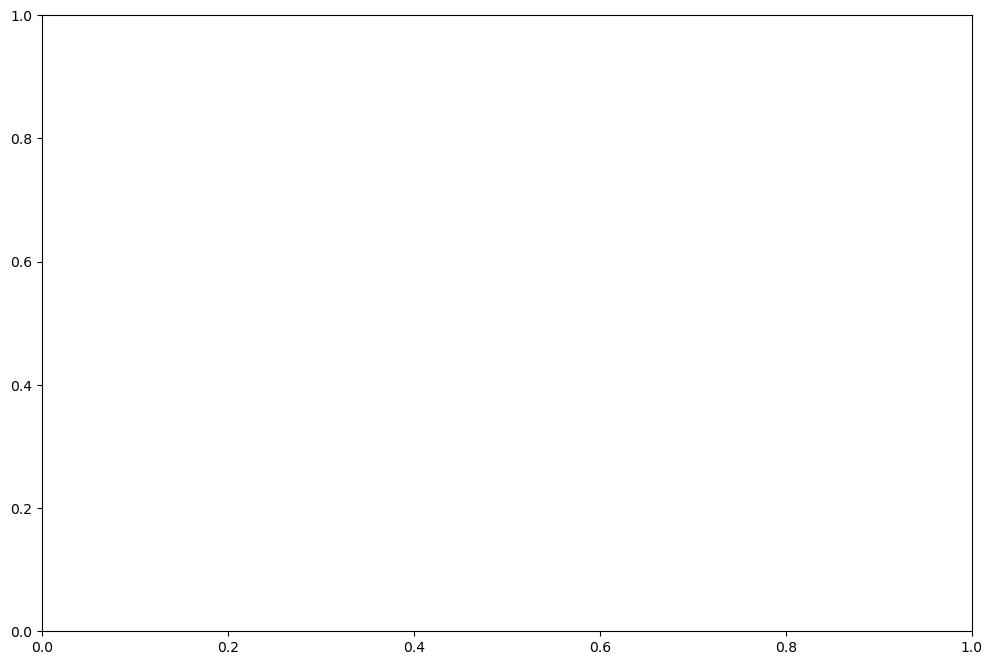

In [11]:
fig, axs = plt.subplots(figsize=(12, 8))
rr.utils.plots.plot_line_ranks({"PAR2":s1comparison, "Solved":s2comparison, "PAR22":s1comparison, "P2AR22":s1comparison, "PAR222":s2comparison}, ax=axs)
plt.tight_layout()
plt.savefig("example_line_rank_plot.pdf")

## Make MO comparison

In [7]:
comparison = rr.comparison.MOBootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=10000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

m1comparison = rr.comparison.MODominationBootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=10000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

default_comparison = rr.comparison.AggregatedComparison(competition,
                                          minimise={"PAR2": True, "solved": False},
                                          aggregation_method={"PAR2": np.mean, "solved": np.sum},)

In [8]:
dranking = default_comparison.get_ranking()
sbdranking = sbranking.merge(dranking, left_index=True, right_index=True)
sbdranking

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_20609/2447309190.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  sbdranking = sbranking.merge(dranking, left_index=True, right_index=True)


groupsolved  groupPAR2  (PAR2, rank)  \
algorithm                                                                   
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup             1          1            11   
Riss6noPP_DRAT                                 1          1             5   
Lingeling bbc maindefault                      1          1             6   
glucose_hack_kiel_newScriptmain_new            1          1             7   
abcdSAT_drupdefault                            1          1            10   
tc_glucosedefault                              1          1             1   
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup             1          1             4   
Riss6default_DRAT                              1          1             3   
Beans And Eggsdefault                          1          1             8   
glucosedefault                                 1          1            14   
tb_glucosedefault                              1          1            12   
COMiniSatPS Chandrasekhar DRUPdrup             1          1             9   
Splatz 06v maindefault                         1          1            13   
GHackCOMSPS_DRUPghack_drup                     1          1            15   
MapleGlucosedefault                            1          2            27   
glue_altdefault                                1          2            19   
Glucose_nbSatdefault                           1          2            20   
glucosePLEdefault                              2          1             2   
cmsat5_main2default                            2          1            17   
cmsat5_autotune2default                        2          1            18   
CHBR_glucosedefault                            2          1            21   
CHBR_glucose_tuneddefault                      2          1            24   
MapleCOMSPS_CHB_DRUPCHB_VSIDS_drup             2          1            16   
MapleCMSdefault                                2          1            23   
glueminisat-2.2.10-81-mainmaintrack            2          2            22   
gulchdefault                                   2          2            26   
Riss6blackbox_DRAT                             2          1            25   
Scavel_SATdefault                              3          2            28   
YalSAT 03rdefault                              4          3            29   

                                     (PAR2, score)  (solved, rank)  \
algorithm                                                            
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup     3412.773196               1   
Riss6noPP_DRAT                         3377.631526               2   
Lingeling bbc maindefault              3385.744974               3   
glucose_hack_kiel_newScriptmain_new    3404.174933               4   
abcdSAT_drupdefault                    3412.462534               6   
tc_glucosedefault                      3355.291960               5   
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup     3368.455730               8   
Riss6default_DRAT                      3366.461532               7   
Beans And Eggsdefault                  3406.272323               9   
glucosedefault                         3444.081417              11   
tb_glucosedefault                      3420.293664              10   
COMiniSatPS Chandrasekhar DRUPdrup     3412.087787              12   
Splatz 06v maindefault                 3440.687978              15   
GHackCOMSPS_DRUPghack_drup             3451.005161              13   
MapleGlucosedefault                    3566.281444              14   
glue_altdefault                        3500.695480              17   
Glucose_nbSatdefault                   3503.845407              16   
glucosePLEdefault                      3360.858677              18   
cmsat5_main2default                    3485.638317              23   
cmsat5_autotune2default                3490.613730              22   
CHBR_glucosedefault                    3512.886070              24   
CHBR_glucose_tuneddefault              

In [9]:
m1ranking = m1comparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
DEBUG:root:flip obj
DEBUG:root:flip obj
INFO:root:Round 0
INFO:root:> Riss6noPP_DRAT has with 22.920% the most wins out of all 29 candidates.
INFO:root:	> Riss6noPP_DRAT loses from GHackCOMSPS_DRUPghack_drup 7.190% times.
INFO:root:	> Riss6noPP_DRAT loses from Scavel_SATdefault 0.000% times.
INFO:root:	> Riss6noPP_DRAT loses from Beans And Eggsdefault 19.940% times.
INFO:root:	> Riss6noPP_DRAT loses from cmsat5_main2default 0.550% times.
INFO:root:	> Riss6noPP_DRAT loses from cmsat5_autotune2default 0.450% times.
INFO:root:	> Riss6noPP_DRAT loses from YalSAT 03rdefault 0.000% times.
INFO:root:	> Riss6noPP_DRAT loses from Lingeling bbc maindefault 46.640% times.
INFO:root:	> Riss6noPP_DRAT loses from glucosedefault 14.220% times.
INFO:root:	> Riss6noPP_DRAT loses from CHBR_g

In [10]:
# default_comparison.get_ranking()
ranking = comparison.get_ranking()
ranking

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
DEBUG:root:flip obj
DEBUG:root:flip obj
INFO:root:Round 0
DEBUG:root:candidates_mask=array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])
DEBUG:root:GHackCOMSPS_DRUPghack_drup     9
DEBUG:root:Scavel_SATdefault              0
DEBUG:root:Beans And Eggsdefault          453
DEBUG:root:cmsat5_main2default            1
DEBUG:root:cmsat5_autotune2default        0
DEBUG:root:YalSAT 03rdefault              0
DEBUG:root:Lingeling bbc maindefault      2909
DEBUG:root:glucosedefault                 136
DEBUG:root:CHBR_glucosedefault            0
DEBUG:root:CHBR_glucose_tuneddefault      0
DEBUG:root:tb_glucos

No candidates to compare


algorithm  group  winner  \
id                                                       
6             Lingeling bbc maindefault      1    True   
14   MapleCOMSPS_DRUPseq_LRB_VSIDS_drup      1    True   
25                    tc_glucosedefault      1    True   
26                       Riss6noPP_DRAT      1    True   
13   MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup      1    True   
20                    glucosePLEdefault      1    True   
27                    Riss6default_DRAT      1    True   
22  glucose_hack_kiel_newScriptmain_new      1   False   
2                 Beans And Eggsdefault      1   False   
21                  abcdSAT_drupdefault      1   False   
10                    tb_glucosedefault      1   False   
11   COMiniSatPS Chandrasekhar DRUPdrup      1   False   
0            GHackCOMSPS_DRUPghack_drup      1   False   
7                        glucosedefault      1   False   
15               Splatz 06v maindefault      1   False   
12   MapleCOMSPS_CHB_DRUPCHB_VSIDS_drup      1   False   
16                 Glucose_nbSatdefault      1   False   
19                      glue_altdefault      1   False   
3                   cmsat5_main2default      1   False   
4               cmsat5_autotune2default      1   False   
17                      MapleCMSdefault      1   False   
28                   Riss6blackbox_DRAT      1   False   
18                  MapleGlucosedefault      2    True   
23  glueminisat-2.2.10-81-mainmaintrack      2    True   
8                   CHBR_glucosedefault      2    True   
9             CHBR_glucose_tuneddefault      2   False   
24                         gulchdefault      2   False   
1                     Scavel_SATdefault      3    True   
5                     YalSAT 03rdefault      4    True   

                           ties  nd_rank_mean  nd_rank_median  nd_rank_ci_lb  \
id                                                                             
6                            {}        1.7118             1.0            0.0   
14                           {}        1.5124             1.0            0.0   
25                           {}        1.4759             1.0            0.0   
26                           {}        1.4397             1.0            0.0   
13                           {}        1.9685             2.0            0.0   
20                           {}        2.1749             2.0            0.0   
27                           {}        1.9895             2.0            0.0   
22  {6, 13, 14, 20, 25, 26, 27}        2.5155             2.0            0.0   
2   {6, 13, 14, 20, 25, 26, 27}        3.3462             3.0            0.0   
21  {6, 13, 14, 20, 25, 26, 27}        2.8781             3.0            0.0   
10  {6, 13, 14, 20, 25, 26, 27}        3.7622             4.0            1.0   
11  {6, 13, 14, 20, 25, 26, 27}        3.6989             4.0            1.0   
0   {6, 13, 14, 20, 25, 26, 27}        5.4088             5.0            2.0   
7   {6, 13, 14, 20, 25, 26, 27}        4.5347             5.0            1.0   
15  {6, 13, 14, 20, 25, 26, 27}        5.7072             6.0            1.0   
12          {6, 20, 25, 26, 27}        6.5542             7.0            2.0   
16                      {27, 6}        7.5439             7.0            5.0   
19                  {26, 27, 6}        7.3752             7.0            4.0   
3                  {25, 27, 20}        8.3647             8.0            4.0   
4                  {25, 27, 20}        8.6197             9.0            4.0   
17                     {25, 20}        8.8379             9.0            5.0   
28                     {25, 20}        9.4197            10.0            4.0   
18                           {}        7.5907             8.0            4.0   
23                           {}        8.5364             8.0            5.0   
8                            {}        9.3692             9.0            5.0   
9                       {8, 23}        9.8078            10.0          

In [11]:
sbranking

table = ranking.set_index("algorithm").merge(sbdranking, left_index=True, right_index=True) 
table
# table = table[["group", "nd_rank_median", "groupsolved", "groupPAR2"]].round(0).astype(int)
# print(table.to_latex())
# # table
for algorithm, scores in table.iterrows():
    cells = [f"{algorithm}".replace("_", "\_")]
    # n = 26
    # if len(algorithm) > n:
    #     cells[0] = cells[0][:n-2] + ".."
    cells.append(f"${scores['group']:.0f}$")
    cells.append(f"${scores['nd_rank_mean']+1:.1f}$")
    cells.append(f"${scores['groupsolved']:.0f}$")
    cells.append(f"${scores[('solved', 'score')]:.0f}$")
    cells.append(f"${scores['groupPAR2']:.0f}$")
    cells.append(f"${scores[('PAR2', 'score')]:.0f}$") 
    print(" & ".join(cells)+" \\\\")

Lingeling bbc maindefault & $1$ & $2.7$ & $1$ & $202$ & $1$ & $3386$ \\
MapleCOMSPS\_DRUPseq\_LRB\_VSIDS\_drup & $1$ & $2.5$ & $1$ & $204$ & $1$ & $3413$ \\
tc\_glucosedefault & $1$ & $2.5$ & $1$ & $198$ & $1$ & $3355$ \\
Riss6noPP\_DRAT & $1$ & $2.4$ & $1$ & $203$ & $1$ & $3378$ \\
MapleCOMSPS\_LRB\_DRUPLRB\_VSIDS\_drup & $1$ & $3.0$ & $1$ & $196$ & $1$ & $3368$ \\
glucosePLEdefault & $1$ & $3.2$ & $2$ & $185$ & $1$ & $3361$ \\
Riss6default\_DRAT & $1$ & $3.0$ & $1$ & $196$ & $1$ & $3366$ \\
glucose\_hack\_kiel\_newScriptmain\_new & $1$ & $3.5$ & $1$ & $199$ & $1$ & $3404$ \\
Beans And Eggsdefault & $1$ & $4.3$ & $1$ & $195$ & $1$ & $3406$ \\
abcdSAT\_drupdefault & $1$ & $3.9$ & $1$ & $198$ & $1$ & $3412$ \\
tb\_glucosedefault & $1$ & $4.8$ & $1$ & $195$ & $1$ & $3420$ \\
COMiniSatPS Chandrasekhar DRUPdrup & $1$ & $4.7$ & $1$ & $193$ & $1$ & $3412$ \\
GHackCOMSPS\_DRUPghack\_drup & $1$ & $6.4$ & $1$ & $191$ & $1$ & $3451$ \\
glucosedefault & $1$ & $5.5$ & $1$ & $194$ & $1$ & $3444$ \\

In [12]:
table = ranking.set_index("algorithm").merge(m1ranking.rename(columns={"group": "m1group"})[["m1group", "ci_median"]], left_index=True, right_index=True)
table = table[["m1group", "nd_rank_median", "group", "ci_median"]].round(0)
print(table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  m1group &  nd\_rank\_median &  group &  ci\_median \\
algorithm                           &          &                 &        &            \\
\midrule
Lingeling bbc maindefault           &        1 &             1.0 &      1 &     1628.0 \\
MapleCOMSPS\_DRUPseq\_LRB\_VSIDS\_drup  &        1 &             1.0 &      1 &     1655.0 \\
tc\_glucosedefault                   &        1 &             1.0 &      1 &     1626.0 \\
Riss6noPP\_DRAT                      &        1 &             1.0 &      1 &     1633.0 \\
MapleCOMSPS\_LRB\_DRUPLRB\_VSIDS\_drup  &        1 &             2.0 &      1 &     1610.0 \\
glucosePLEdefault                   &        1 &             2.0 &      1 &     1629.0 \\
Riss6default\_DRAT                   &        1 &             2.0 &      1 &     1613.0 \\
glucose\_hack\_kiel\_newScriptmain\_new &        1 &             2.0 &      1 &     1644.0 \\
Beans And Eggsdefault               &        1 &             3.0 &      1 

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_20609/4156455387.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex())


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont:

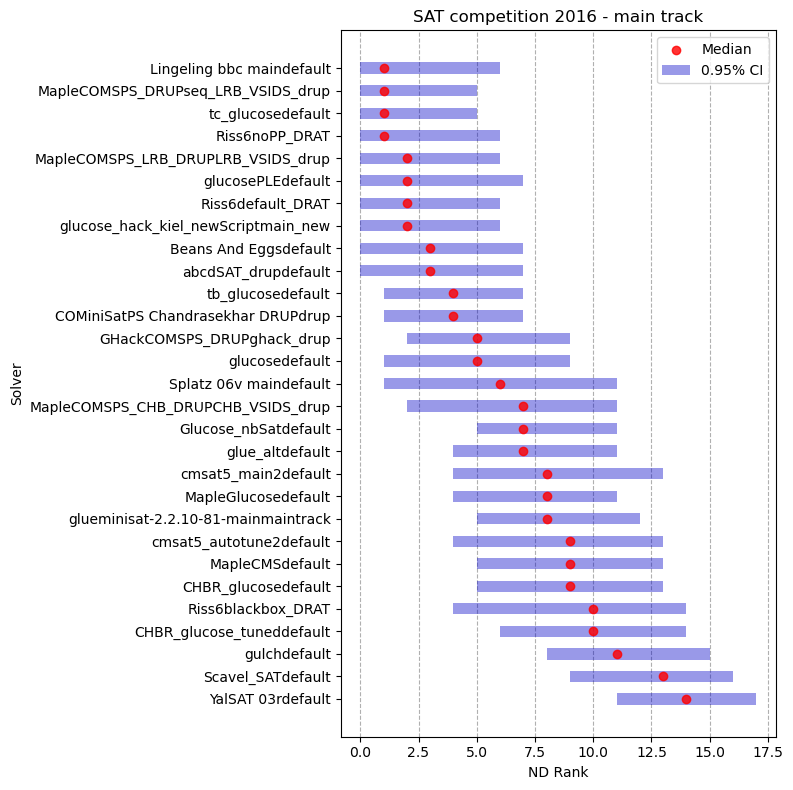

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
top = -1  # -1 shows all

cidf = ranking.sort_values("nd_rank_median", ascending=True)

means = []
yticks = []
handles = []

ax.set_axisbelow(True)
ax.grid(axis="x", linestyle="--", zorder=-1)

n = len(cidf) if top <= 0 else min(len(cidf), top)
for i, (algorithm, bounds) in enumerate(cidf.iloc[:n].iterrows()):
    pos = n - i
    means.append([bounds["nd_rank_median"], pos])
    yticks.append(bounds["algorithm"])
    height = 0.5
    bar = patches.Rectangle(
        (bounds["nd_rank_ci_lb"], pos - (height / 2)),
        bounds["nd_rank_ci_ub"] - bounds["nd_rank_ci_lb"],
        height,
        facecolor=(0, 0, 0.78, 0.4),
        label="{:.2f}% CI".format(1 - comparison.alpha),
    )
    p = ax.add_patch(bar)

handles.append(ax.scatter(*zip(*means), color="red", label="Median", alpha=0.8))
handles.append(p)

ax.set_xlabel("ND Rank")
ax.set_ylabel("Solver")
ax.set_yticks(list(range(1, n + 1)))
ax.set_yticklabels(yticks[::-1])
ax.legend(handles=handles)
plt.title("SAT competition 2016 - main track")
plt.tight_layout()
plt.show()

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/jeroen/Software/miniconda3/envs/EmpiricalComparison/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='ob

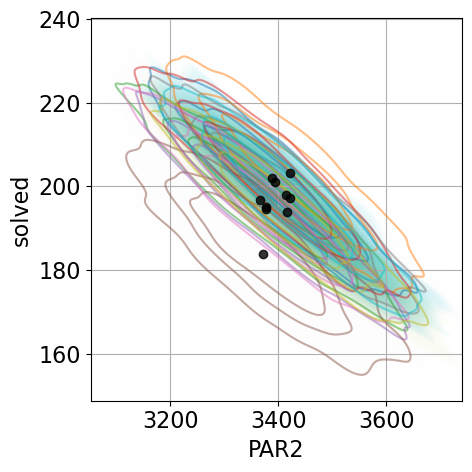

In [19]:
# fig, ax = plt.subplots(1, 1, figsize=(3,3))
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1, figsize=(5,5))
rr.utils.plots.plot_ci_density_estimations(comparison, algorithms=ranking.iloc[:10]["algorithm"].to_list(), show_names=False, ax=ax)
ranking.iloc[:10]["algorithm"].to_list()
ax.grid()
plt.tight_layout()
plt.savefig("SAT2016_os.png", dpi=600)
plt.savefig("SAT2016_os.pdf", dpi=600)

In [16]:
comparison = rr.comparison.MODominationBootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=1000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

comparison.get_ranking()

/Users/jeroen/Documents/Work/Projects/EmpiricalComparison/robustranking/comparison/abstract_comparison.py:50: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
DEBUG:root:flip obj
DEBUG:root:flip obj
INFO:root:Round 0
INFO:root:> Riss6noPP_DRAT has with 23.300% the most wins out of all 29 candidates.
INFO:root:	> Riss6noPP_DRAT loses from GHackCOMSPS_DRUPghack_drup 8.600% times.
INFO:root:	> Riss6noPP_DRAT loses from Scavel_SATdefault 0.000% times.
INFO:root:	> Riss6noPP_DRAT loses from Beans And Eggsdefault 21.400% times.
INFO:root:	> Riss6noPP_DRAT loses from cmsat5_main2default 0.600% times.
INFO:root:	> Riss6noPP_DRAT loses from cmsat5_autotune2default 0.800% times.
INFO:root:	> Riss6noPP_DRAT loses from YalSAT 03rdefault 0.000% times.
INFO:root:	> Riss6noPP_DRAT loses from Lingeling bbc maindefault 47.700% times.
INFO:root:	> Riss6noPP_DRAT loses from glucosedefault 14.600% times.
INFO:root:	> Riss6noPP_DRAT loses from CHBR_g

group  ranked 1st  group wins  \
algorithm                                                            
Riss6noPP_DRAT                           1       0.233       0.088   
Lingeling bbc maindefault                1       0.213       0.071   
tc_glucosedefault                        1       0.142       0.245   
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup       1       0.139       0.149   
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup       1       0.094       0.026   
Riss6default_DRAT                        1       0.053       0.157   
abcdSAT_drupdefault                      1       0.035       0.004   
glucose_hack_kiel_newScriptmain_new      1       0.034       0.005   
Beans And Eggsdefault                    1       0.031       0.014   
COMiniSatPS Chandrasekhar DRUPdrup       1       0.011       0.005   
glucosedefault                           1       0.007       0.001   
tb_glucosedefault                        1       0.005       0.001   
Splatz 06v maindefault                   1       0.002       0.037   
GHackCOMSPS_DRUPghack_drup               1       0.001       0.000   
cmsat5_main2default                      1       0.000       0.146   
cmsat5_autotune2default                  1       0.000       0.079   
CHBR_glucosedefault                      1       0.000       0.074   
CHBR_glucose_tuneddefault                1       0.000       0.147   
MapleCOMSPS_CHB_DRUPCHB_VSIDS_drup       1       0.000       0.014   
Glucose_nbSatdefault                     1       0.000       0.001   
MapleCMSdefault                          1       0.000       0.025   
MapleGlucosedefault                      1       0.000       0.000   
glue_altdefault                          1       0.000       0.000   
glucosePLEdefault                        1       0.000       0.229   
glueminisat-2.2.10-81-mainmaintrack      1       0.000       0.019   
gulchdefault                             1       0.000       0.463   
Riss6blackbox_DRAT                       2       0.000       2.000   
Scavel_SATdefault                        3       0.000       2.000   
YalSAT 03rdefault                        4       0.000       2.000   

                                         ci_mean    ci_median  ci_lb  \
algorithm                                                              
Riss6noPP_DRAT                       1791.134867  1603.647113  185.0   
Lingeling bbc maindefault            1794.086212  1617.610630  184.0   
tc_glucosedefault                    1777.271992  1588.697821  181.0   
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup   1782.996983  1628.512935  178.0   
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup   1808.214080  1647.855184  187.0   
Riss6default_DRAT                    1781.853225  1598.116083  178.0   
abcdSAT_drupdefault                  1805.312710  1631.133101  181.0   
glucose_hack_kiel_newScriptmain_new  1802.462521  1613.591357  181.0   
Beans And Eggsdefault                1800.500373  1626.286259  178.0   
COMiniSatPS Chandrasekhar DRUPdrup   1802.323772  1639.805034  176.0   
glucosedefault                       1818.622302  1658.639501  176.0   
tb_glucosedefault                    1807.899271  1622.368734  177.0   
Splatz 06v maindefault               1813.275193  1636.678080  168.0   
GHackCOMSPS_DRUPghack_drup           1821.267775  1650.912866  173.0   
cmsat5_main2default                  1831.778490  1655.823588  160.0   
cmsat5_autotune2default              1834.616013  1655.904350  159.0   
CHBR_glucosedefault                  1845.190166  1680.431840  159.0   
CHBR_glucose_tuneddefault            1846.415624  1688.975616  158.0   
MapleCOMSPS_CHB_DRUPCHB_VSIDS_drup   1821.062876  1678.966254  166.0   
Glucose_nbSatdefault                 1846.068882  1679.194295  168.0   
MapleCMSdefault                      1847.460124  1671.459985  162.0   
MapleGlucosedefault                  1877.204697  1720.570079  170.0   
glue_altdefault                      1843.952925  1675.862398  168.0   
glucosePLEdefault                    1773.499010  1604.463445  168

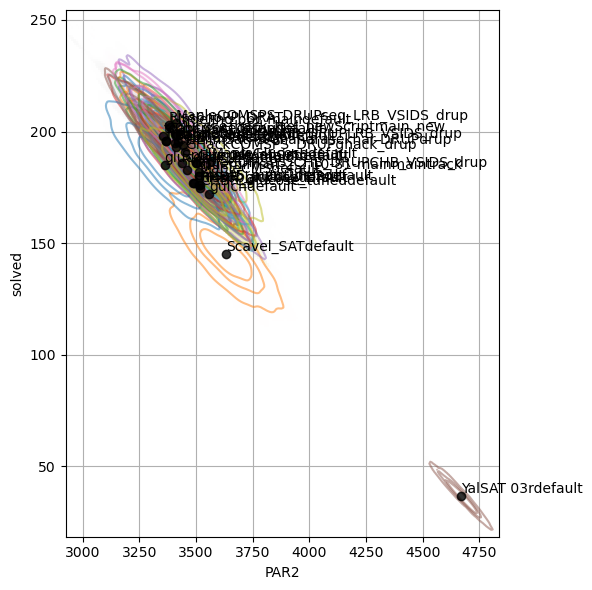

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
algs = [a for a in competition.algorithms if a not in ["Jeremy"]]
rr.utils.plots.plot_ci_density_estimations(comparison, algorithms=algs, show_names=True, ax=ax)
# ax.scatter([880], [3100], color="red")
# ax.text(880, 3100, "Ideal", color="red")
plt.grid()
plt.tight_layout()
plt.show()

In [18]:
dist = comparison._get_distributions(always_minimise=False)
np.mean(dist, axis=0)

array([[14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
       [14.],
      

NameError: name 'plot_ci_density_estimations' is not defined

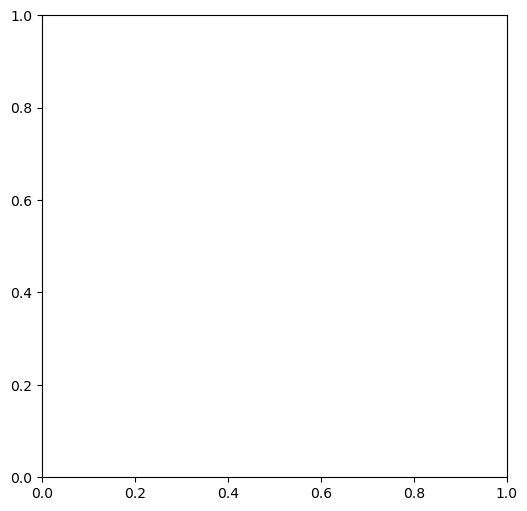

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
algs = [a for a in competition.algorithms if a not in ["Jeremy"]]
plot_ci_density_estimations(comparison, algorithms=algs, show_names=True, ax=ax)
# ax.scatter([880], [3100], color="red")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
ddf = default_comparison.get_ranking().sort_values(("PAR2", "rank"))
ddf = ddf.merge(bsrank, left_index=True, right_index=True)

fig, ax = plt.subplots(1,1,figsize=(5,4))

points = ddf[[("PAR2", "score"), ("solved", "score")]].to_numpy()
points[:, 1] = -points[:, 1]
fronts , _, _, ndr = fast_non_dominated_sorting(points)
plt.scatter(ddf[("PAR2","score")], ddf[("solved","score")], c=ndr)
# for algo, row in ddf.iterrows():
#     # print(row[("PAR2","score")], row[("solved","score")])
#     plt.text(row[("PAR2","score")], row[("solved","score")], f"{row['group']:.0f}", clip_on=True)

for i, (algo, row) in enumerate(ddf.iterrows()):
    plt.text(row[("PAR2","score")], row[("solved","score")]+0.5, f"{ndr[i]+1}", clip_on=True, va="bottom", ha="center")
    
for algindex in np.argwhere(ndr == 0):
    iloc = algindex[0]
    series = ddf.iloc[iloc]
    # print(series.name)
    # print(series[("PAR2","score")], series[("solved","score")], series.name)
    #plt.text(series[("PAR2","score")], series[("solved","score")], series.name)
#plt.title("SAT competition 2016 - main track")

for i, front in enumerate(fronts[:1]):
    front_points = points[front, :]
    line = pareto_line(front_points, np.max(points, axis=0))
    line[:, 1] *= -1
    plt.plot(*line.T, color="grey", zorder=0, alpha=0.5)

plt.xlim(3300, 3700)
plt.xlabel("PAR2 (minimise)")
plt.ylim(170, 210)
plt.ylabel("Solved (maximise)")
plt.tight_layout()
plt.savefig("sat2016front.pdf")
plt.show()

In [ ]:
def pareto_line(points: np.ndarray, maxima: list[float | int]):
    points = points[points.argsort(axis=0)[:,0],:]
    line = [[points[0, 0], maxima[1]]]
    for i, (x, y) in enumerate(points):
        line.append([x, y])
        if i+1 < len(points):
            line.append([points[i+1,0], y])
        else:
            line.append([maxima[0], y])
    return np.array(line)

for i, front in enumerate(fronts):
    front_points = points[front, :]
    line = pareto_line(front_points, np.max(points, axis=0))
    line[:, 1] *= -1
    plt.plot(*line.T, color="grey")

plt.xlim(3300, 3700)
plt.xlabel("PAR2 (minimise)")
plt.ylim(170, 210)
plt.ylabel("Solved (maximise)")
plt.tight_layout()
plt.show()
plt.show()



# Compare MOrankings with SOrankings

In [ ]:
for obj in comparison.benchmark.objectives:
    filtered_competition = comparison.benchmark.filter(objectives=obj)
    
    mo_comparison = MOBootstrapComparison(filtered_competition,
                                          minimise=comparison.minimise[obj],
                                          aggregation_method=comparison.aggregation_method[obj],
                                          alpha=0.05,
                                          bootstrap_runs=1000)
    
    so_comparison = BootstrapComparison(filtered_competition,
                                        minimise=comparison.minimise[obj],
                                        aggregation_method=comparison.aggregation_method[obj],
                                        alpha=0.05,
                                        bootstrap_runs=1000)
    
    mo_comparison.compute()
    so_comparison._cache = copy.copy(mo_comparison._cache)
    
    rdf = mo_comparison.get_ranking()
    rdf = rdf.merge(so_comparison.get_ranking(), left_index=True, right_index=True)
    verdict = np.count_nonzero(np.not_equal(rdf["group_x"].tolist(), rdf["group_y"].tolist())) == 0
    verdictlabel = "equal" if verdict else "not equal!!"
    print(f"{obj:10} rankings are {verdictlabel}")
    if not verdict:
        print(rdf["group_x"].tolist())
        print(rdf["group_y"].tolist())
        display(mo_comparison.get_comparison_table())
        display(so_comparison.get_comparison_table())

In [ ]:
mo_comparison.get_comparison_table().stack().merge(so_comparison.get_comparison_table().stack(), left_index=True, right_index=True, suffixes=["_mo", "_so"])

In [ ]:
distributions = comparison._get_cache()["distributions"]
distributions = copy.copy(distributions)
distributions[:, :, 1] *= -1
print(f"{distributions.shape=}")

allranks = []
for sample in range(distributions.shape[1]):
    _, _, _, ranks = fast_non_dominated_sorting(distributions[:, sample, :])
    allranks.append(ranks)
allranks = np.array(allranks).T
allranks.shape

In [ ]:
np.argmax(np.count_nonzero(allranks == 1, axis=1))

## Plots


In [ ]:
plot_ci_density_estimations(comparison, ["Riss6noPP_DRAT", "tc_glucosedefault", "Scavel_SATdefault"])
plot_ci_density_estimations(comparison, ["Riss6noPP_DRAT", "tc_glucosedefault"])

In [ ]:
def plot_comparison_distribution(comparison, algorithms):
    cache = comparison._get_cache()
    s1 = cache["meta_data"]["algorithms"].index(algorithms[0])
    s2 = cache["meta_data"]["algorithms"].index(algorithms[1])

    distributions = cache["distributions"]
    p_value = comparison.statistical_test(*algorithms)
    direction = -1 if comparison.minimise else 1
    diff = direction * (distributions[s1,:] - distributions[s2,:])
    diff = np.sort(diff)
    plt.grid()
    plt.plot(diff, np.linspace(0, 1, len(diff)))
    plt.axvline(0, c="black", linewidth=1.25, linestyle="-")
    plt.axhline(p_value, c="red", linestyle="--")
    plt.text(diff.max() , p_value+0.01, f"p-value: {p_value:.3f}", ha="right")
    plt.title(f"'{algorithms[0]}' vs '{algorithms[1]}'")
    plt.xlabel("Minimal performance difference")
    plt.ylabel("Fraction of bootstraps")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


plot_comparison_distribution(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "Riss6noPP_DRAT"])
plot_comparison_distribution(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "COMiniSatPS Chandrasekhar DRUPdrup"])

In [ ]:
def plot_distribution_cdf(comparison, algorithms):
    cache = comparison._get_cache()
    distributions = cache["distributions"]

    if not isinstance(algorithms, list):
        algorithms = [algorithms]

    for algorithm in algorithms:
        s1 = cache["meta_data"]["algorithms"].index(algorithm)

        #direction = -1 if comparison.minimise else 1
        diff = distributions[s1,:]
        diff = np.sort(diff)
        plt.plot(diff, np.linspace(0, 1, len(diff)), label=algorithm)

    # plt.axhline(0, c="black", linewidth=1.25, linestyle="-")
    # plt.axvline(p_value, c="red", linestyle="--")
    # plt.text(p_value+0.01, diff.max(), f"p-value = {p_value:.3%}")
    plt.title("CDF")
    plt.xlabel("Performance")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

plot_distribution_cdf(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "COMiniSatPS Chandrasekhar DRUPdrup"])
plot_distribution_cdf(comparison, ["YalSAT 03rdefault"])

In [ ]:
fronts, dominates, domination_count, ranks = fast_non_dominated_sorting(points)

In [ ]:
comparison = BootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise={"PAR2": True, "solved": False},
                                 bootstrap_runs=10000,
                                 aggregation_method={"PAR2": np.mean, "solved": np.sum})

comparison.compute()

In [ ]:
dist = comparison._get_cache()["distributions"]
dist.shape
allranks = []
for sample in range(dist.shape[1]):
    _, dl, _, ranks = fast_non_dominated_sorting(dist[:, sample, :])
    allranks.append(ranks)
allranks = np.array(allranks)
avranks = np.mean(allranks, axis=0)

In [ ]:
np.argsort(np.argsort(avranks))

In [20]:
allranks.shape

(10000, 29)

In [21]:
a = np.random.rand(8,1000,2)
np.mean(a, axis=1)

array([[0.5008703 , 0.50297121],
       [0.50565999, 0.50128407],
       [0.4864395 , 0.48936062],
       [0.49662023, 0.50155548],
       [0.50272003, 0.50129317],
       [0.5052422 , 0.50119211],
       [0.49002375, 0.49134641],
       [0.49585745, 0.51667543]])